In [2]:
%load_ext autoreload
%autoreload 1
%aimport new

# Radial basis functions for Interpolation

To introduce RBF we start with interpolation.

**References:**

* Robert Schaback, *A Practical Guide to Radial Basis Functions* (see literature folder)

## Interpolation

Given node points $x_k \in \Omega \subset \mathbb{R}^d$ and values $y_k \in \mathbb{R}$ for $k = 1, \dots, n$, determine a function $f \colon \Omega \to \mathbb{R}$ such that

$$ f(x_k) = y_k \qquad (k = 1, \dots, n). $$

Often, $f$ is taken as a linear combination of *basis functions* $(F_k)_{k=1}^n$:

$$ f(x) = \sum_{k=1}^n \lambda_k F_k(x). $$

## Radial Basis Functions (RBFs)

To avoid singularities, it makes sense to have the basis $(F_k)$ depend on the nodes $(x_k)$ in a suitable way. One possible choice are radially symmetric functions centered on the nodes:

$$ f(x) = \sum_{k=1}^n \lambda_k \Phi(\lVert x - x_k \rVert), $$

where $\Phi \colon \mathbb{R}_{+} \to \mathbb{R}$ is called a *radial basis function*. Usually $\Phi$ is chosen such that $x \mapsto \Phi(\lVert x - y \rVert)$ is sufficiently smooth on $\mathbb{R}^d$ for all $y$, in particular at the origin $x = y$.

Choices for RBFs include

- **Gaussian**: $\Phi(r) = \exp(-r^2)$
- **Multiquadric**: $\Phi(r) = \sqrt{1 + r^2}$
- **Inverse Quadratic**: $\Phi(r) = (1 + r^2)^{-1}$
- ...

## Scaling

Depending on the density of nodes, it makes sense to use $\Phi(r/c)$ instead of $\Phi(r)$ for some scaling factor $c > 0$.

## Linear System

Determining the coefficients $(\lambda_k)$ for the interpolant from node points $(x_k)$, values $(y_k)$ and (scaled) RBF $\Phi$ in the most straight-forward way amounts to solving the linear equation

$$ A \lambda = y, $$

where $A \in \mathbb{R}^{n \times n}$ is the matrix with coefficients

$$ a_{jk} = \Phi(\lVert x_j - x_k \rVert). $$

This matrix can be shown to be non-singular for many choices of RBF. It is however usually *ill-conditioned*, i.e. determining $\lambda$ from $y$ is numerically unstable.

Since we do not usually care for $\lambda$ itself, but only for the values of the interpolant $f(x)$ (at points other than the nodes $x_k$), this not always a problem in practice. If it is, there are ways to stabilize the solution ($\longrightarrow$ later).



Create Node


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
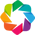

In [1]:
import holoviews as hv
import numpy as np
hv.extension("bokeh")

In [61]:
from functools import partial

In [47]:
nodes = new.createnodes(50)
hv.Scatter(nodes)

:Scatter   [x]   (y)

In [12]:
def f(x):
    return np.sin(2*np.pi*x[:, 0]) * np.sin(2*np.pi*x[:, 1])

In [83]:
gridpoints = np.mgrid[0:1:60j, 0:1:60j]
rbf = partial(new.phi_gaussian, scale=.05)

In [87]:
y = f(nodes)
lamb = new.interpolation(nodes, rbf, y, regpar=1)

interpolated_vals = new.apply_interp(lamb, rbf, nodes, gridpoints)

options = {'Image': dict(colorbar=True)}
hv.Image(interpolated_vals).options(options)

:Image   [x,y]   (z)

In [67]:
options = {'Image': dict(colorbar=True)}
hv.Image(f(new.to_node_list(gridpoints)).reshape(gridpoints[0].shape)).options(options)

:Image   [x,y]   (z)

In [72]:
N = 100
points = np.zeros((N, 2))
for i in range(100):
    nodes = new.createnodes(100)
    cond = new.condition_number(nodes, rbf)
    separation = new.separation_distance(nodes)
    points[i, 0] = separation
    points[i, 1] = cond
hv.Scatter(points).options(logx=True)

:Scatter   [x]   (y)

In [53]:
hv.help(hv.Scatter)

Scatter

Online example: http://holoviews.org/reference/elements/bokeh/Scatter.html

-------------
Style Options
-------------

	alpha, angle, cmap, color, fill_alpha, fill_color, hover_alpha, hover_color, hover_fill_alpha, hover_fill_color, hover_line_alpha, hover_line_color, line_alpha, line_cap, line_color, line_dash, line_join, line_width, marker, muted_alpha, muted_color, muted_fill_alpha, muted_fill_color, muted_line_alpha, muted_line_color, nonselection_alpha, nonselection_color, nonselection_fill_alpha, nonselection_fill_color, nonselection_line_alpha, nonselection_line_color, palette, selection_alpha, selection_color, selection_fill_alpha, selection_fill_color, selection_line_alpha, selection_line_color, size, visible

(Consult bokeh's documentation for more information.)

------------
Plot Options
------------

The plot options are the parameters of the plotting class:

Parameters of 'PointPlot'

Parameters changed from their default values are marked in red.
Soft bound value